In [1]:
from functools import reduce
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
# main dataset
price = pd.read_csv('data\Raw_Price.csv')

# feature dataset
## income
income = pd.read_excel('data\Income.xls') # long feature
income_inequality = pd.read_excel('data\Income_Inequality_Ratio.xls') # long feature
ad_household_wage = pd.read_excel('data\Mean_Household_Wages_Adjusted_by_Cost.xls')

## education
BD = pd.read_excel('data\Bachelor_Degree_or_Higher.xls') # long feature
high_school = pd.read_excel('data\High_School_Graduate_or_Higher.xls') # long feature

## market
inventory_new = pd.read_excel('data\Inventory_New_Listing_Percent.xls')
inventory_total = pd.read_excel('data\Inventory_Total_Listing_Percent.xls')
demand = pd.read_excel('data\Market_Demand_Score.xls')
nielsen_rank = pd.read_excel('data\Market_Nielsen_Household_Rank.xls')
supply = pd.read_excel('data\Market_Supply_Score.xls')

## population
migration = pd.read_excel(r'data\Net_Migration_Flow.xls')  # long feature
resident = pd.read_excel('data\Resident_Population.xls')  # long feature

features = [income, income_inequality, ad_household_wage, BD, high_school, inventory_new, 
            inventory_total, demand, nielsen_rank, supply, migration, resident]
long_features = [income, income_inequality, BD, high_school, migration, resident]
short_features = [ad_household_wage, inventory_new, inventory_total, demand, nielsen_rank, supply]

In [3]:
price

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,StateCodeFIPS,MunicipalCodeFIPS,2000-01-31,...,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30
0,3101,0,Los Angeles County,County,CA,CA,Los Angeles-Long Beach-Anaheim,6,37,216203.0,...,704506.0,708342.0,715696.0,722507.0,732988.0,746604.0,764593.0,784164.0,796021.0,804544.0
1,139,1,Cook County,County,IL,IL,Chicago-Naperville-Elgin,17,31,178120.0,...,270561.0,271185.0,273475.0,275258.0,278326.0,280129.0,283167.0,286747.0,290535.0,293157.0
2,1090,2,Harris County,County,TX,TX,Houston-The Woodlands-Sugar Land,48,201,114681.0,...,217394.0,219452.0,221985.0,223177.0,224930.0,227083.0,231923.0,237301.0,243076.0,247453.0
3,2402,3,Maricopa County,County,AZ,AZ,Phoenix-Mesa-Scottsdale,4,13,144822.0,...,335024.0,342475.0,348905.0,357692.0,364476.0,376760.0,388276.0,401560.0,411054.0,419434.0
4,2841,4,San Diego County,County,CA,CA,San Diego-Carlsbad,6,73,227601.0,...,673586.0,683219.0,691697.0,702036.0,716007.0,737001.0,760630.0,784188.0,798971.0,809206.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2816,425,3101,Camas County,County,ID,ID,Hailey,16,25,NaN,...,145256.0,147078.0,151047.0,155262.0,158758.0,161606.0,164224.0,166517.0,167985.0,174203.0
2817,1648,3102,Daggett County,County,UT,UT,NaN,49,9,NaN,...,245321.0,247474.0,250126.0,252830.0,257503.0,261981.0,265907.0,268440.0,270077.0,272437.0
2818,2345,3112,Hinsdale County,County,CO,CO,NaN,8,53,NaN,...,331821.0,333380.0,335005.0,339023.0,343678.0,348460.0,351842.0,353155.0,355670.0,365426.0
2819,1933,3122,Mineral County,County,CO,CO,NaN,8,79,NaN,...,290237.0,292307.0,295141.0,296746.0,298253.0,300829.0,304356.0,309710.0,312826.0,324328.0


In [4]:
for i in features:
    print(i.shape)

(3089, 13)
(3139, 12)
(812, 13)
(3143, 12)
(3143, 12)
(995, 53)
(995, 53)
(995, 52)
(995, 52)
(995, 52)
(3139, 13)
(3138, 14)


In [5]:
# Get all data file names in folder "data"
import os
filePath = 'data\..'
for dirpath, dirnames, filenames in os.walk(filePath):
    print(filenames)

['cleansing_schools.py', 'CPI.csv', 'data.ipynb', 'IR.csv', 'midterm code.ipynb', 'private_schools_clean', 'Project Proposal.pdf', 'public_schools_clean', 'README.md']
['COMMIT_EDITMSG', 'config', 'description', 'FETCH_HEAD', 'HEAD', 'index', 'ORIG_HEAD', 'packed-refs']
['applypatch-msg.sample', 'commit-msg.sample', 'fsmonitor-watchman.sample', 'post-update.sample', 'pre-applypatch.sample', 'pre-commit.sample', 'pre-merge-commit.sample', 'pre-push.sample', 'pre-rebase.sample', 'pre-receive.sample', 'prepare-commit-msg.sample', 'update.sample']
['exclude']
['HEAD']
[]
['main']
[]
['HEAD', 'main']
[]
['b62a628ecf642b69b3d2a7dce7e092f537c7e5', 'b724bbc62327ae8cfa79a4529ba1b4b021c4b9']
['d58ede5d47b0b0a48ef46d8c0fdc2423559b63']
['d2b5b7448b088b7c7853ab9b5176f2c17b8d63']
['5ce2da2d6447d11dfe32bfb846c3d5b199fc99']
['1d9cf2e883b9607f63a15fbe6541ab3652c880']
['a7cf5a2d276a469cde14d0e23585ee6ed35134']
['663d5e2c141c233ebc1390732679e4b547d5b3']
['be04997db1c90f57e99486327c6af072cdc594']
['d33521

# Dataset Generation

In [6]:
# merge features to the price dataset as "df"
all_long_features = reduce(lambda left, right: pd.merge(left, right, on=['RegionName','State']), long_features)
all_short_features = reduce(lambda left, right: pd.merge(left, right, on=['RegionName','State']), short_features)
df = pd.merge(price, all_long_features, on=['RegionName','State'])

print(price.count(), df.count())

In [9]:
feature_names = df.columns
for i in range(len(feature_names)):
    print(str(i), "\t", str(feature_names[i]),"\t\t\t", str(type(df.iloc[0,i])))

0 	 RegionID 			 <class 'numpy.int64'>
1 	 SizeRank 			 <class 'numpy.int64'>
2 	 RegionName 			 <class 'str'>
3 	 RegionType 			 <class 'str'>
4 	 StateName 			 <class 'str'>
5 	 State 			 <class 'str'>
6 	 Metro 			 <class 'str'>
7 	 StateCodeFIPS 			 <class 'numpy.int64'>
8 	 MunicipalCodeFIPS 			 <class 'numpy.int64'>
9 	 2000-01-31 			 <class 'numpy.float64'>
10 	 2000-02-29 			 <class 'numpy.float64'>
11 	 2000-03-31 			 <class 'numpy.float64'>
12 	 2000-04-30 			 <class 'numpy.float64'>
13 	 2000-05-31 			 <class 'numpy.float64'>
14 	 2000-06-30 			 <class 'numpy.float64'>
15 	 2000-07-31 			 <class 'numpy.float64'>
16 	 2000-08-31 			 <class 'numpy.float64'>
17 	 2000-09-30 			 <class 'numpy.float64'>
18 	 2000-10-31 			 <class 'numpy.float64'>
19 	 2000-11-30 			 <class 'numpy.float64'>
20 	 2000-12-31 			 <class 'numpy.float64'>
21 	 2001-01-31 			 <class 'numpy.float64'>
22 	 2001-02-28 			 <class 'numpy.float64'>
23 	 2001-03-31 			 <class 'numpy.float64'>
24 	 2001-04-30 	

# Data Visualization

### Monthly average price trend

C:\Users\15519\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


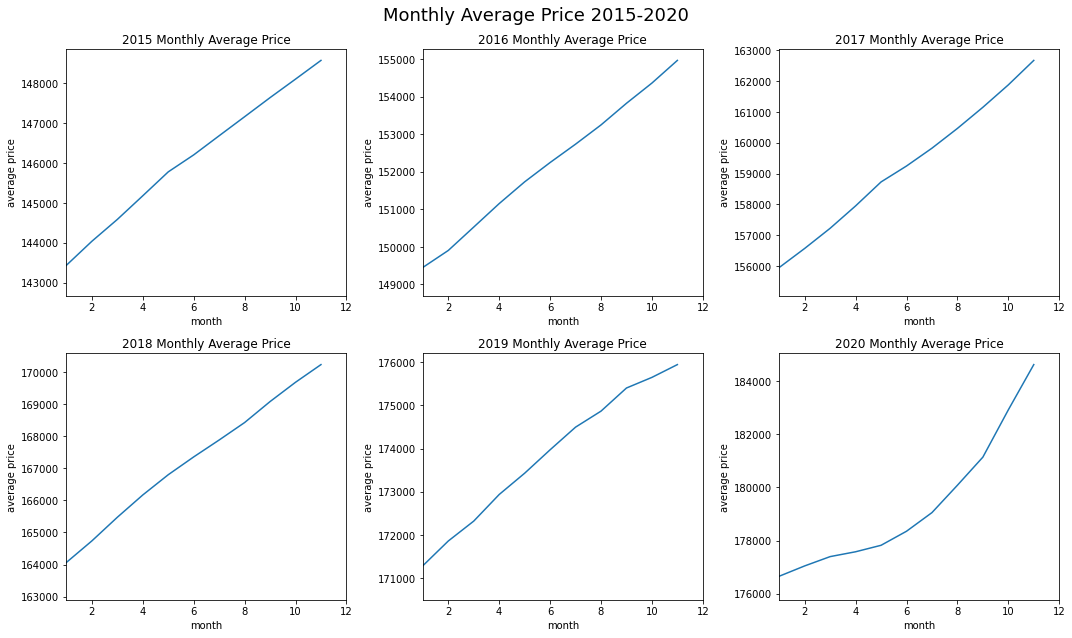

In [10]:
#draw 2015-2019 subplot
ave_price = pd.Series()
for j in [5,6,7,8,9]:
    ave_price['201%d'%j] = df.filter(regex='201%d-'%j)

fig = plt.figure(figsize=(15, 9))
for i in [5,6,7,8,9]:
    plt.subplot(2,3,i-4)
    mean = []
    p = ave_price['201%d'%i]
    for col in p.columns:
        mean.append(p[col].mean())
    plt.plot(mean)
    plt.xlim((1,12))
    plt.xlabel('month')
    plt.ylabel('average price')
    plt.title('201%d Monthly Average Price'%i)

# draw 2020 subplot
plt.subplot(2,3,6)
mean = []
p = df.filter(regex='2020-')
for col in p.columns:
    mean.append(p[col].mean())
plt.plot(mean)
plt.xlim((1,12))
plt.xlabel('month')
plt.ylabel('average price')
plt.title('2020 Monthly Average Price')

plt.suptitle('Monthly Average Price 2015-2020', fontsize=18)
plt.tight_layout()

# Preliminary models

### KMeans Classification

C:\Users\15519\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  f"KMeans is known to have a memory leak on Windows "


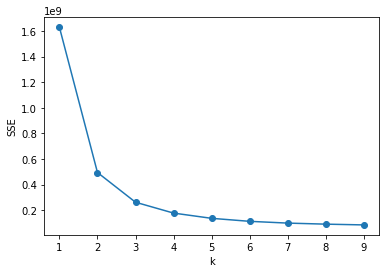

In [12]:
SSE = []  # sum of squared error
for k in range(1, 10):
    estimator = KMeans(init = 'k-means++', n_clusters = k)
    estimator.fit(all_short_features.iloc[:,2:].dropna())
    SSE.append(estimator.inertia_)
X = range(1, 10)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(X, SSE, 'o-')
plt.show()

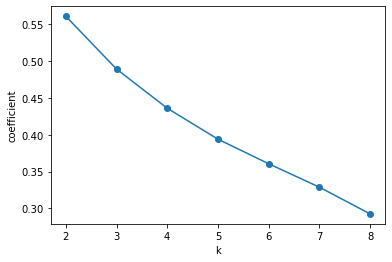

In [13]:
Scores = []  # silhouette coefficient
for k in range(2, 9):
    estimator = KMeans(n_clusters=k)  
    estimator.fit(all_short_features.iloc[:,2:].dropna())
    Scores.append(silhouette_score(all_short_features.iloc[:,2:].dropna(), estimator.labels_, metric='euclidean'))
X = range(2, 9)
plt.xlabel('k')
plt.ylabel('coefficient')
plt.plot(X, Scores, 'o-')
plt.show()